In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('data/AAPL.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
5,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.399707,12157600
6,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.419162,9340800
7,1980-12-23,0.551339,0.553571,0.551339,0.551339,0.436848,11737600
8,1980-12-24,0.580357,0.582589,0.580357,0.580357,0.459840,12000800
9,1980-12-26,0.633929,0.636161,0.633929,0.633929,0.502287,13893600


In [3]:
# changing date into proper format
df['Date']=pd.to_datetime(df.Date, format = "%Y-%m-%d")
df.index=df['Date']
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1980-12-12,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
2020-03-26,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
2020-03-27,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
2020-03-30,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100


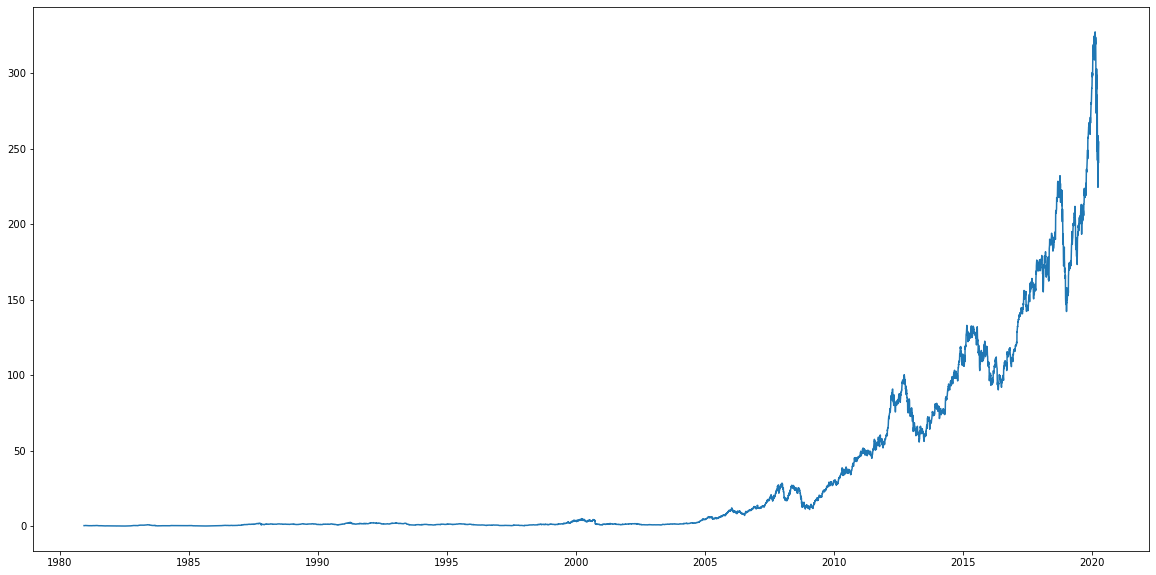

In [4]:
# plot closing price across history, to give overview of data
plt.figure(figsize= (20, 10))
plt.plot(df['Date'],df['Close'], label = 'Close Price History')

In [5]:
data=df.sort_index(ascending=True,axis=0)
new_df = data.loc[data['Close'] > 50]
new_df1 = new_df[['Date','Close']]
new_df1

,Date,Close
Date,,
2011-02-07,2011-02-07,50.268570
2011-02-08,2011-02-08,50.742859
2011-02-09,2011-02-09,51.165714
2011-02-10,2011-02-10,50.648571
2011-02-11,2011-02-11,50.978573
...,...,...
2020-03-26,2020-03-26,258.440002
2020-03-27,2020-03-27,247.740005
2020-03-30,2020-03-30,254.809998


In [6]:
new_dataset=pd.DataFrame(index=range(0,len(new_df1)),columns=['Date','Close'])

for i in range(0,len(new_df1)):
    new_dataset["Date"][i]=new_df1['Date'][i]
    new_dataset["Close"][i]=new_df1["Close"][i]
new_dataset

,Date,Close
0,2011-02-07 00:00:00,50.26857
1,2011-02-08 00:00:00,50.742859
2,2011-02-09 00:00:00,51.165714
3,2011-02-10 00:00:00,50.648571
4,2011-02-11 00:00:00,50.978573
...,...,...
2222,2020-03-26 00:00:00,258.440002
2223,2020-03-27 00:00:00,247.740005
2224,2020-03-30 00:00:00,254.809998
2225,2020-03-31 00:00:00,254.289993


In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
final_dataset

array([[50.26856994628906],
       [50.74285888671875],
       [51.165714263916016],
       ...,
       [254.80999755859372],
       [254.2899932861328],
       [240.91000366210935]], dtype=object)

In [10]:
train_data=final_dataset[0:1782,:]
valid_data=final_dataset[1782:,:]

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)


In [13]:
scaled_data=scaler.fit_transform(new_dataset)


In [14]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [15]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)


In [16]:
x_train_data.shape

(1722, 60)

In [17]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [18]:
#Build Model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

C:\Users\nada7\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1722/1722 - 42s - loss: 4.4673e-04 - 42s/epoch - 24ms/step


In [19]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

14/14 [==============================] - 2s 14ms/step


In [20]:
lstm_model.save("saved_model.h5")

C:\Users\nada7\AppData\Local\Temp\ipykernel_1284\2760692956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predicted_closing_price


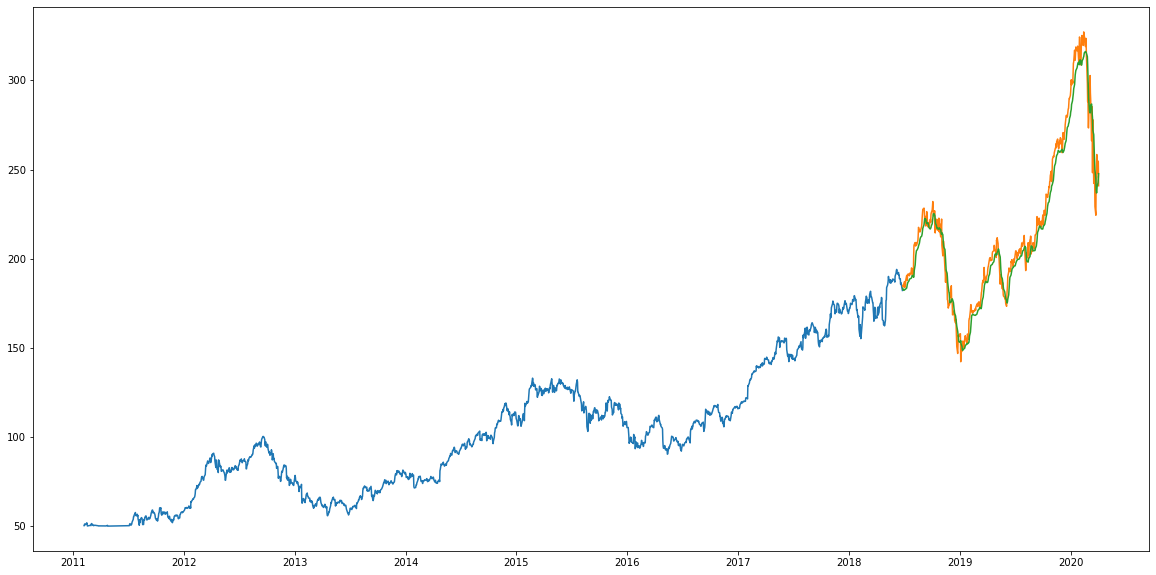

In [21]:
train=new_dataset[:1782]
valid=new_dataset[1782:]
valid['Predictions']=predicted_closing_price
plt.plot(train["Close"])
plt.plot(valid[['Close',"Predictions"]])